----
# **Ch07 데이터 정제하기**
----

#### 데이터 정제란? 정상적이지 않은 데이터를 찾아 원하는 방향으로 바로잡는 것
#### > 결측치(missing value)는 누락된 값을 의미, 즉 원하는 값이 아닌 값
#### > Python에서는 결측치가 'NaN'으로 표시된다. NaN은 "Not a Number"의 약자

## **[07-1] 결측치 정제하기**

### **[] 결측치 생성하기**
#### **numpy.nan**
#### > Python에서는 NaN 값을 실수형(float)의 한 형태로 처리
#### > 열 변수에 NaN 가 있으면 그 열 전체는 실수형으로 간주됨, 자료형의 일관성 때문

In [1]:
## 결측치 만들기
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [2]:
## NaN은 실수형
type(df['sex'][2])

float

In [4]:
## 결측치는 연산에서 자동 제외
df['score'] + 10

0    15.0
1    14.0
2    13.0
3    14.0
4     NaN
Name: score, dtype: float64

### **[] 결측치 확인하기**
#### > **.isna()**
#### > **.isna().sum()**

In [5]:
## 결측치 존재 확인하기
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [6]:
## 결측치 빈도 확인하기
pd.isna(df).sum()

sex      1
score    1
dtype: int64

In [97]:
## 결측치 빈도 확인하기
df[['sex', 'score']].isna().sum()

sex      1
score    1
dtype: int64

#### **결측치 행으로 데이터 프레임 만들기**

In [7]:
## 결측치 행 확인: 결측치 행으로 데이터 프레임 만들기
df[df['sex'].isna()]

,sex,score
2,NaN,3.0


In [8]:
## 결측치 행 확인: 결측치 행으로 데이터 프레임 만들기
df[df['score'].isna()]

,sex,score
4,F,NaN


### **[] 결측치 제거하기**
### > **.dropna()**
##### >> axis: 행(0) 단위로 결측치를 제거. 만약 axis=1로 설정하면 열 단위로 제거
##### >> how: 결측치 제거 방식
##### >>> 'any' (기본값): 하나 이상의 결측치가 있으면 해당 행 또는 열을 제거
##### >>> 'all': 행과 열의 모든 값이 결측치인 경우에만 제거
##### >> thresh: 유효한 값의 개수가 이 값보다 적은 행이나 열은 제거하지 않음.
##### >> subset: 제거할 때 영향을 받는 특정 열(들)을 지정
##### >> inplace: 기본값은 False,.새로운 DataFrame 또는 Series를 반환, 만약 True로 설정하면 원본 데이터만 변경 

In [9]:
## > 결측치 있는 행 제거하기
df.dropna(subset = ['score'])  # score 결측치 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [10]:
## > 결측치가 제거된 프레임 만들기
df = df.dropna(subset = ['score'])  # score 변수(열)에서 결측치가 제거된 데이터 프레임 만들기
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


#### **<> 모든 결측치가 제거된 데이터 추출하기**
#### > **.dropna()** 결측치가 있는 행 제거

In [11]:
## #모든 결측치가 제거된 데이터 추출하기
df_nomiss = df.dropna()  # 모든 결측치가 있는 행 제거
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


#### **<> 여러 변수에 결측치 없는 데이터 추출하기**

In [12]:
## 여러 변수에 결측치 없는 데이터 추출하기
df_nomiss = df.dropna(subset = ['score', 'sex'])  # score, sex 결측치 제거
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


#### **<> 결측치 제거하지 않고 분석하기**
##### > .mean(), .sum(), .groupby()는 결측치를 제외하고 연산을 수행

In [13]:
###### **<> 결측치 제거하지 않고 분석하기**
df['score'].mean()

4.0

In [14]:
###### **<> 결측치 제거하지 않고 분석하기**
df['score'].sum()

16.0

In [15]:
#### **<> 결측치 제거하지 않고 분석하기**
df.groupby('sex').agg(mean_score = ('score', 'mean'),
                      sum_score  = ('score', 'sum'))

,mean_score,sum_score
sex,,
F,4.0,4.0
M,4.5,9.0


### **[] 결측치 대체하기**
#### > 결측치를 원하는 값으로 일괄 대체
#### > **.fillna()**

In [16]:
## 결측치 만들기
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'   : ['M', 'F', np.nan, 'M', 'F'],
                   'score' : [5, 4, 3, 4, np.nan]})
df['score'] = df['score'].fillna(0)  #결측치를 0으로 대체
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,0.0


In [17]:
## 외부 데이터 불러오기
exam = pd.read_csv('exam.csv')           # 데이터 불러오기
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [18]:
## 임의의 위치 값을 결측치로 대체하기
exam = pd.read_csv('exam.csv')           # 데이터 불러오기
exam.loc[[2, 7, 14], ['math']] = np.nan  # 2, 7, 14행의 math에 NaN 할당
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [22]:
## 'math'의 NaN 값을 평균값으로 일괄 대체하기
avg = exam['math'].mean()  #열 평균값 구하기
exam['math'] = exam['math'].fillna(avg)  # math가 NaN이면 avg로 대체
exam  

,id,nclass,math,english,science
0,1,1,50.000000,98,50
1,2,1,60.000000,97,60
2,3,1,55.235294,86,78
3,4,1,30.000000,98,58
4,5,2,25.000000,80,65
5,6,2,50.000000,89,98
6,7,2,80.000000,90,45
7,8,2,55.235294,78,25
8,9,3,20.000000,98,15
9,10,3,50.000000,98,45


In [20]:
## 결측치 빈도 확인하기
exam['math'].isna().sum()

0

#### **<> Null('NaN'인 값을 다른 값으로 대체하기: .fillin(), pd.isnull()**

In [21]:
## Null('NaN'인 값을 다른 값으로 대체하기: .fillin()
import pandas as pd
import numpy as np

data = {'column1': [1, 2, np.nan, 4, 5],
        'column2': [np.nan, 2, 3, 4, np.nan]}

df = pd.DataFrame(data)

# NaN 값을 0으로 대체
df_filled = df.fillna(0)
df_filled

,column1,column2
0,1.0,0.0
1,2.0,2.0
2,0.0,3.0
3,4.0,4.0
4,5.0,0.0


In [23]:
## Null('NaN'인 값을 다른 값으로 대체하기: pd.isnull로 확인 후 변경
import pandas as pd

data = {'column1': [1, 2, np.nan, 4, 5],
        'column2': [np.nan, 2, 3, 4, np.nan]}

df = pd.DataFrame(data)

# NaN 값을 0으로 대체
for index, row in df.iterrows():
    if pd.isnull(df.at[index, 'column1']):
        df.at[index, 'column1'] = 0
df

,column1,column2
0,1.0,NaN
1,2.0,2.0
2,0.0,3.0
3,4.0,4.0
4,5.0,NaN


## **[07-2] 이상치 정제하기**
#### > 이상치(anomaly)는 정상 범위에서 벗어난 이상한 값

In [24]:
#### 이상치(anomaly) 데이터 생성
df = pd.DataFrame({'sex'   : [1, 2, 1, 3, 2, 1], 
                   'score' : [5, 4, 3, 4, 2, 6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


### **<> 이상치 확인하기**

In [25]:
#### > 이상치(anomaly)
df['sex'].value_counts().sort_index()  #빈도순 정렬(True)

sex
1    3
2    2
3    1
Name: count, dtype: int64

### **<> 이상치 대체하기**
#### > Python에서는 NaN 값을 실수형의 한 형태로 처리
#### > 열 변수를 NaN 처리하면 그 열 전체가 실수형으로 전환됨, 자료형의 일관성 때문

In [26]:
## sex가 3이면 NaN 부여
import numpy as np
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])  # np.where(Expression, True, False)# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


### **[연습] 결측치를 제외하고 통계 구하기**
#### > 'sex'별 'score' 평균에 대한 데이터 프레임을 생성

In [27]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기
df.dropna(subset = ['sex', 'score']) \
       .groupby('sex') \
       .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [51]:
# sex, score 결측치 제거
# sex별 분리
# score 평균 구하기
df.groupby('sex') \
  .agg(mean_score = ('score', 'mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


----
#### **(알아 두면 좋아요) np.where()는 문자와 NaN을 함께 반환할 수 없습니다.**
#### > 왜냐하면, NaN은 실수형으로 관리되기 때문임.

In [28]:
df = pd.DataFrame({'x1' : [1, 1, 2, 2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)  # 조건에 맞으면 문자 부여
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [32]:
## 문자열 변수에 np.nan을 대입하면 'nan' 문자열 값으로 대입됨
df['x2'].isna()

0    False
1    False
2    False
3    False
Name: x2, dtype: bool

In [33]:
## 문자열 변수에 np.nan을 대입하면 'nan' 문자열 값으로 대입됨
type(df.loc[2,'x2'])

str

In [34]:
# 'nan'를 NaN으로 바꾸기
df['x2'] = df['x2'].replace('nan', np.nan)  
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [35]:
df['x2'].isna()

0    False
1    False
2     True
3     True
Name: x2, dtype: bool

### **[] 이상치 제거하기 - 극단적인 값**
#### 상자 그림으로 극단치 기준 정하기

### **1. 상자 그림 살펴보기**

In [47]:
## 'mpg.csv'의 데이터 프레임 구축
mpg = pd.read_csv('mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='hwy'>

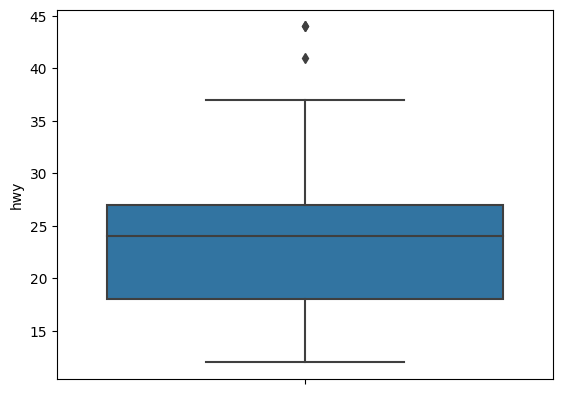

In [37]:
## mpg의 boxplot 그래프 그리기
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

#### **<boxplot 해석>**
##### > Outer 극단치
##### > Maximum 극단치 경계 최대값
##### > Upper Quartile 상위 25%(Q3 : 3사분위)
##### > Median 중위(Q2 : 2사분위)
##### > LowerR Quartile 하위 25%(Q1 : 1사분위)
##### > Minimum 극단치 경계 최솟값
https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99D3C43359C2943722

### **2. 극단치 기준값 구하기**
#### **(1) 1사분위수, 3사분위수 구하기**

In [38]:
## 1사분위수 구하기
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [39]:
## 3사분위수 구하기
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

#### **(2) IQR 구하기**
##### > IQR(사분위 범위)는 1사분위수와 3사분위수의 거리

In [40]:
## IQR 구하기
iqr = pct75 - pct25
iqr

9.0

#### **(3) 하한, 상한 구하기**
##### > 하한 : Q1 - 1.5*IQR
##### > 하한 : Q3 + 1.5*IQR

In [41]:
pct25 - 1.5 * iqr  # 하한

4.5

In [42]:
pct75 + 1.5 * iqr  # 상한

40.5

### **3. 극단치를 결측 처리하기**

In [43]:
# 4.5 ~ 40.5 벗어나면 NaN 부여
import numpy as np
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

In [44]:
## 결측치 행 확인: 'hwy'열의 값이 NaN인 경우만 데이터 프레임 구성
mpg[mpg['hwy'].isna()]  # 'hwy'열의 값이 NaN인 경우만 데이터 프레임 구성

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,NaN,d,compact
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,NaN,d,subcompact
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,NaN,d,subcompact


In [45]:
## 결측치 제거하지않고 분석하기
mpg.groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


### **4. 결측치 제거하고 분석하기**
##### > .mean(), .sum(), .groupby()는 결측치를 제외하고 연산을 수행

In [46]:
## 결측치 제거하고 분석하기
# hwy 결측치 제거
# drv별 분리
# hwy 평균 구하기
mpg.dropna(subset = ['hwy']) \
   .groupby('drv') \
   .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


### **[실습-1] 결측치를 제외하고 통계 구하기**
#### 1. 'mpg.csv' 파일을 읽어서 데이터 프레임을 구성하기
#### 2. 데이터 프레임의 'cty'열에 대한 boxplot 그래프 그리기
#### 3. 하한값, 상한값 구하기
#### 4. 극단치를 결측 처리하기
##### > 결측 처리 결과 'cty' 값이 NaN인 행 검색
#### 5. 'cty'의 결측치 제거하고 분석하기
##### > model별 cty 평균 구하기 

In [129]:
#### 1. 'mpg.csv'의 데이터 프레임 구축
mpg = pd.read_csv('mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


## **[실습-2] mpg 데이터 가공하기**
#### 1. 'mpg.csv' 파일을 읽어서 데이터 프레임을 구성하기
#### 2. mpg 데이터 프레임에서 'trans'열의 값 빈도 분포를 확인
#### 3. 'auto' 파생변수 생성
#### > 'trans' 열 값에 'auto'가 있으면 1, 'manual'이 있으면 0으로 처리, 그 외는 NaN 처리
#### 4. 'gear' 파생변수 생성
#### > 'trans' 열 값의 ')' 앞에 값으로 판단, 숫자가 아니면 NaN 처리
#### 5. 'auto'와 'gear'열의 결측치(NaN) 확인 
#### > 결측치 빈도 확인
#### > 결측치 행 확인
#### 6. 'auto'와 'gear'별 분포 수 데이터 프레임 생성
#### > 단, 결측치(NaN) 행은 사전에 차단

### **정리하기**

In [ ]:
## 1. 결측치 정제하기
pd.isna(df).sum()                                 # 결측치 확인
df_nomiss = df.dropna(subset = ['score'])         # 결측치 제거
df_nomiss = df.dropna(subset = ['score', 'sex'])  # 여러 변수 동시에 결측치 제거


## 2. 이상치 정제하기

# 이상치 확인
df['sex'].value_counts(sort = False)

# 이상치 결측 처리
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])

# 상자 그림으로 극단치 기준값 찾기
pct25 = mpg['hwy'].quantile(.25)  # 1사분위수
pct75 = mpg['hwy'].quantile(.75)  # 3사분위수
iqr = pct75 - pct25               # IQR
pct25 - 1.5 * iqr                 # 하한
pct75 + 1.5 * iqr                 # 상한

# 극단치 결측 처리
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])